<a href="https://colab.research.google.com/github/EricPettersonL/Alura_store_25/blob/main/AluraStoreBr25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Inicio do projeto



### Importação de bibliotecas

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importação dos dados

In [26]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [33]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# 2. Analise dos Dados

## 1. Análise do faturamento


In [30]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(faturamento_loja1)
print(faturamento_loja2)
print(faturamento_loja3)
print(faturamento_loja4)

1534509.12
1488459.06
1464025.03
1384497.58


In [31]:
faturamentos = {'Loja' : ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], 'Faturamento' : [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]}
faturamentos = pd.DataFrame(faturamentos)
faturamentos


,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


In [108]:
faturamento_total = faturamentos
total = faturamento_total['Faturamento'].sum()
faturamento_total['% de Faturamento'] = (faturamento_total['Faturamento'] / total) * 100
faturamento_total['% de Faturamento'] = faturamento_total['% de Faturamento'].map('{:.2f}%'.format)
faturamento_total["Diferença %"] = faturamento_total["Faturamento"].pct_change() * 100
faturamento_total["Diferença %"] = faturamento_total["Diferença %"].map('{:.2f}%'.format)
faturamento_total

,Loja,Faturamento,% de Faturamento,Diferença %
0,Loja 1,1534509.12,26.13%,nan%
1,Loja 2,1488459.06,25.35%,-3.00%
2,Loja 3,1464025.03,24.93%,-1.64%
3,Loja 4,1384497.58,23.58%,-5.43%


## 2. Vendas por Categoria


In [34]:
# Agrupando por categoria e contando vendas por loja
vendas_categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].count().sort_values(ascending=False)
vendas_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].count().sort_values(ascending=False)
vendas_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].count().sort_values(ascending=False)
vendas_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].count().sort_values(ascending=False)

# Exibindo os resultados
print("Loja 1 - Vendas por Categoria do Produto:\n", vendas_categoria_loja1, "\n")
print("Loja 2 - Vendas por Categoria do Produto:\n", vendas_categoria_loja2, "\n")
print("Loja 3 - Vendas por Categoria do Produto:\n", vendas_categoria_loja3, "\n")
print("Loja 4 - Vendas por Categoria do Produto:\n", vendas_categoria_loja4, "\n")


Loja 1 - Vendas por'Categoria do Produto:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: Preço, dtype: int64 

Loja 2 - Vendas por'Categoria do Produto:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: Preço, dtype: int64 

Loja 3 - Vendas por'Categoria do Produto:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: Preço, dtype: int64 

Loja 4 - Vendas por'Categori

In [35]:
# Adicionando coluna "Loja"
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [36]:
# Concatenando todos os dataframes
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [38]:
# Criando a pivot table
tabela_categorias = todas_lojas.pivot_table(
    index='Categoria do Produto', # Linhas
    columns='Loja',               # Colunas
    values='Preço',               # Valores que serão contados
    aggfunc='count'               # Contar quantidade de vendas
)

print(tabela_categorias)

Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


## 3. Média de Avaliação das Lojas

In [41]:
media_avaliacao_loja1 = loja['Avaliação da compra'].mean().round(2)
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean().round(2)
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean().round(2)
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean().round(2)

print(media_avaliacao_loja1)
print(media_avaliacao_loja2)
print(media_avaliacao_loja3)
print(media_avaliacao_loja4)

3.98
4.04
4.05
4.0


In [42]:
media_avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média_Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
})

print(media_avaliacoes)

     Loja  Média_Avaliação
0  Loja 1             3.98
1  Loja 2             4.04
2  Loja 3             4.05
3  Loja 4             4.00


## 4. Produtos Mais e Menos Vendidos

In [43]:
# Função para calcular produtos mais e menos vendidos
def produtos_mais_menos_vendidos(df, nome_loja):
    vendas_produto = df.groupby('Produto')['Preço'].count().reset_index()
    vendas_produto.rename(columns={'Preço': 'Quantidade_Vendida'}, inplace=True)
    vendas_produto = vendas_produto.sort_values('Quantidade_Vendida', ascending=False)

    mais_vendidos = vendas_produto.head(5)  # Top 5 mais vendidos
    menos_vendidos = vendas_produto.tail(5) # Top 5 menos vendidos

    print(f"=== {nome_loja} ===")
    print("Produtos mais vendidos:\n", mais_vendidos, "\n")
    print("Produtos menos vendidos:\n", menos_vendidos, "\n")

# Aplicando para cada loja
produtos_mais_menos_vendidos(loja, 'Loja 1')
produtos_mais_menos_vendidos(loja2, 'Loja 2')
produtos_mais_menos_vendidos(loja3, 'Loja 3')
produtos_mais_menos_vendidos(loja4, 'Loja 4')


=== Loja 1 ===
Produtos mais vendidos:
                Produto  Quantidade_Vendida
47       TV Led UHD 4K                  60
37         Micro-ondas                  60
24       Guarda roupas                  60
43  Secadora de roupas                  58
3     Blocos de montar                  56 

Produtos menos vendidos:
                         Produto  Quantidade_Vendida
13  Ciência de dados com python                  39
40                     Pandeiro                  36
41            Panela de pressão                  35
11                 Celular ABXY                  33
26                      Headset                  33 

=== Loja 2 ===
Produtos mais vendidos:
                      Produto  Quantidade_Vendida
28  Iniciando em programação                  65
37               Micro-ondas                  62
1                    Bateria                  61
49                    Violão                  58
40                  Pandeiro                  58 

Produtos menos vendidos:

## 5. Frete Médio por Loja


In [44]:
media_frete_loja1 = loja['Frete'].mean().round(2)
media_frete_loja2 = loja2['Frete'].mean().round(2)
media_frete_loja3 = loja3['Frete'].mean().round(2)
media_frete_loja4 = loja4['Frete'].mean().round(2)

In [45]:
media_frete = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Custo_Medio_Frete': [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
})
print(media_frete)

     Loja  Custo_Medio_Frete
0  Loja 1              34.69
1  Loja 2              33.62
2  Loja 3              33.07
3  Loja 4              31.28


# 3. Gráficos

## 1) Gráfico de barras: Faturamento por loja

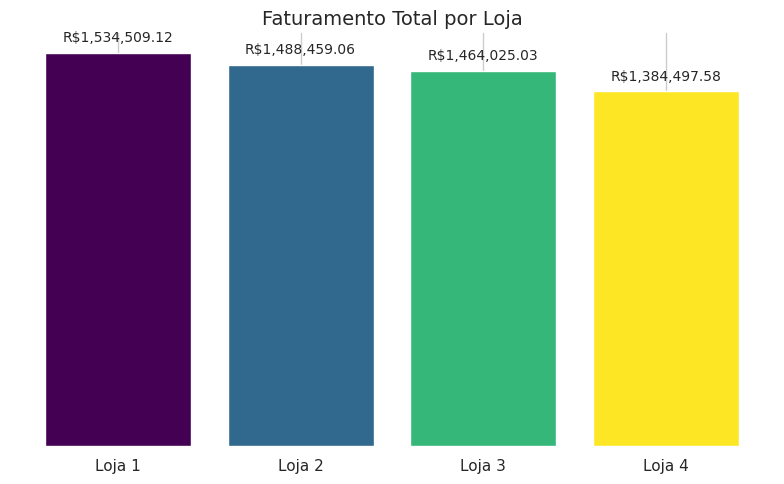

In [89]:
lojas = faturamentos['Loja']
faturamento = faturamentos['Faturamento']

cores = plt.cm.viridis(np.linspace(0,1,len(lojas)))

plt.figure(figsize=(8,5))
barras = plt.bar(lojas, faturamento, color=cores)

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.02*max(faturamento), f'R${altura:,.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Faturamento Total por Loja', fontsize=14)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

ax.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig("faturamento_lojas.png", dpi=300, bbox_inches='tight')

plt.show()


In [65]:
plt.savefig("faturamento_lojas.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

##  2) Gráfico de barras: Quantidade de produtos vendidos por categoria (pivot table)

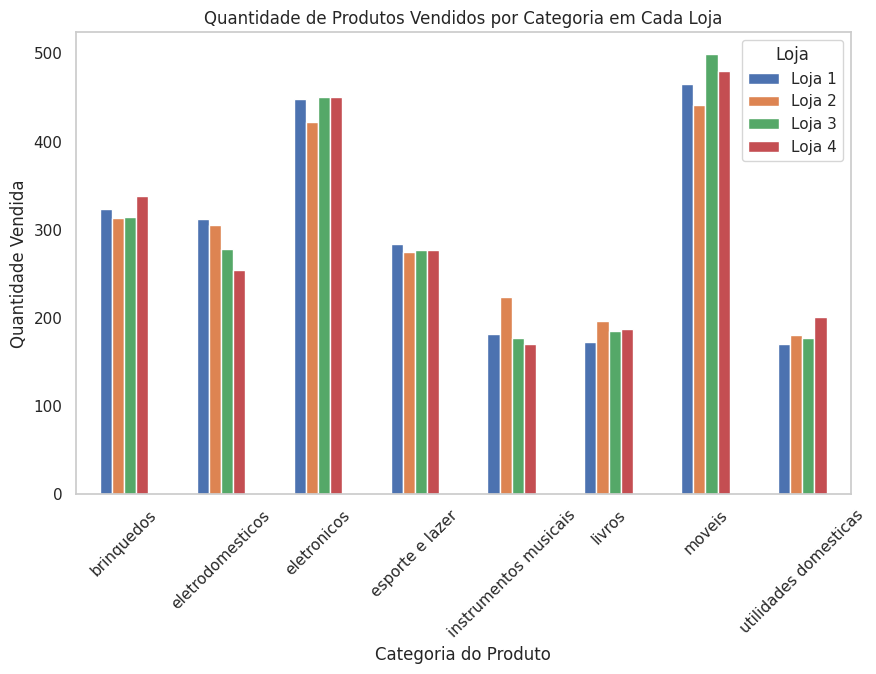

In [101]:
tabela_categorias.plot(kind='bar', figsize=(10,6))
plt.title('Quantidade de Produtos Vendidos por Categoria em Cada Loja')
plt.ylabel('Quantidade Vendida')
plt.grid([])
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.savefig("quantidade_produtos_por_categoria.png", dpi=300, bbox_inches='tight')
plt.show()

## 3) Gráfico de dispersão: Média de Avaliações vs Custo Médio de Frete

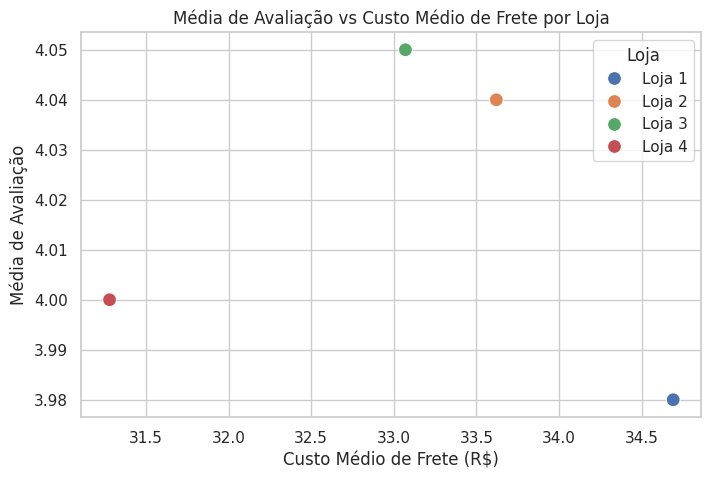

In [103]:
avaliacao_frete = pd.merge(media_avaliacoes, media_frete, on='Loja')

plt.figure(figsize=(8,5))
sns.scatterplot(x='Custo_Medio_Frete', y='Média_Avaliação', data=avaliacao_frete, hue='Loja', s=100)
plt.title('Média de Avaliação vs Custo Médio de Frete por Loja')
plt.xlabel('Custo Médio de Frete (R$)')
plt.ylabel('Média de Avaliação')
plt.grid(True)
plt.savefig("avaliacao_frete.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Relatório Final - Decisão de Venda

O objetivo desta análise é auxiliar o Senhor João na decisão de qual loja deve ser vendida, considerando fatores financeiros e operacionais. Foram avaliados quatro aspectos principais de cada loja:

*  Faturamento total.
*  Distribuição de vendas por categoria.
*  Produtos mais e menos vendidos.
*  Média das avaliações dos clientes.
*  Custo médio de frete.

As informações foram extraídas dos dados das lojas e visualizadas por meio de gráficos para facilitar a compreensão dos padrões e tendências.

###  Faturamento Total

O gráfico abaixo apresenta o faturamento total de cada loja:

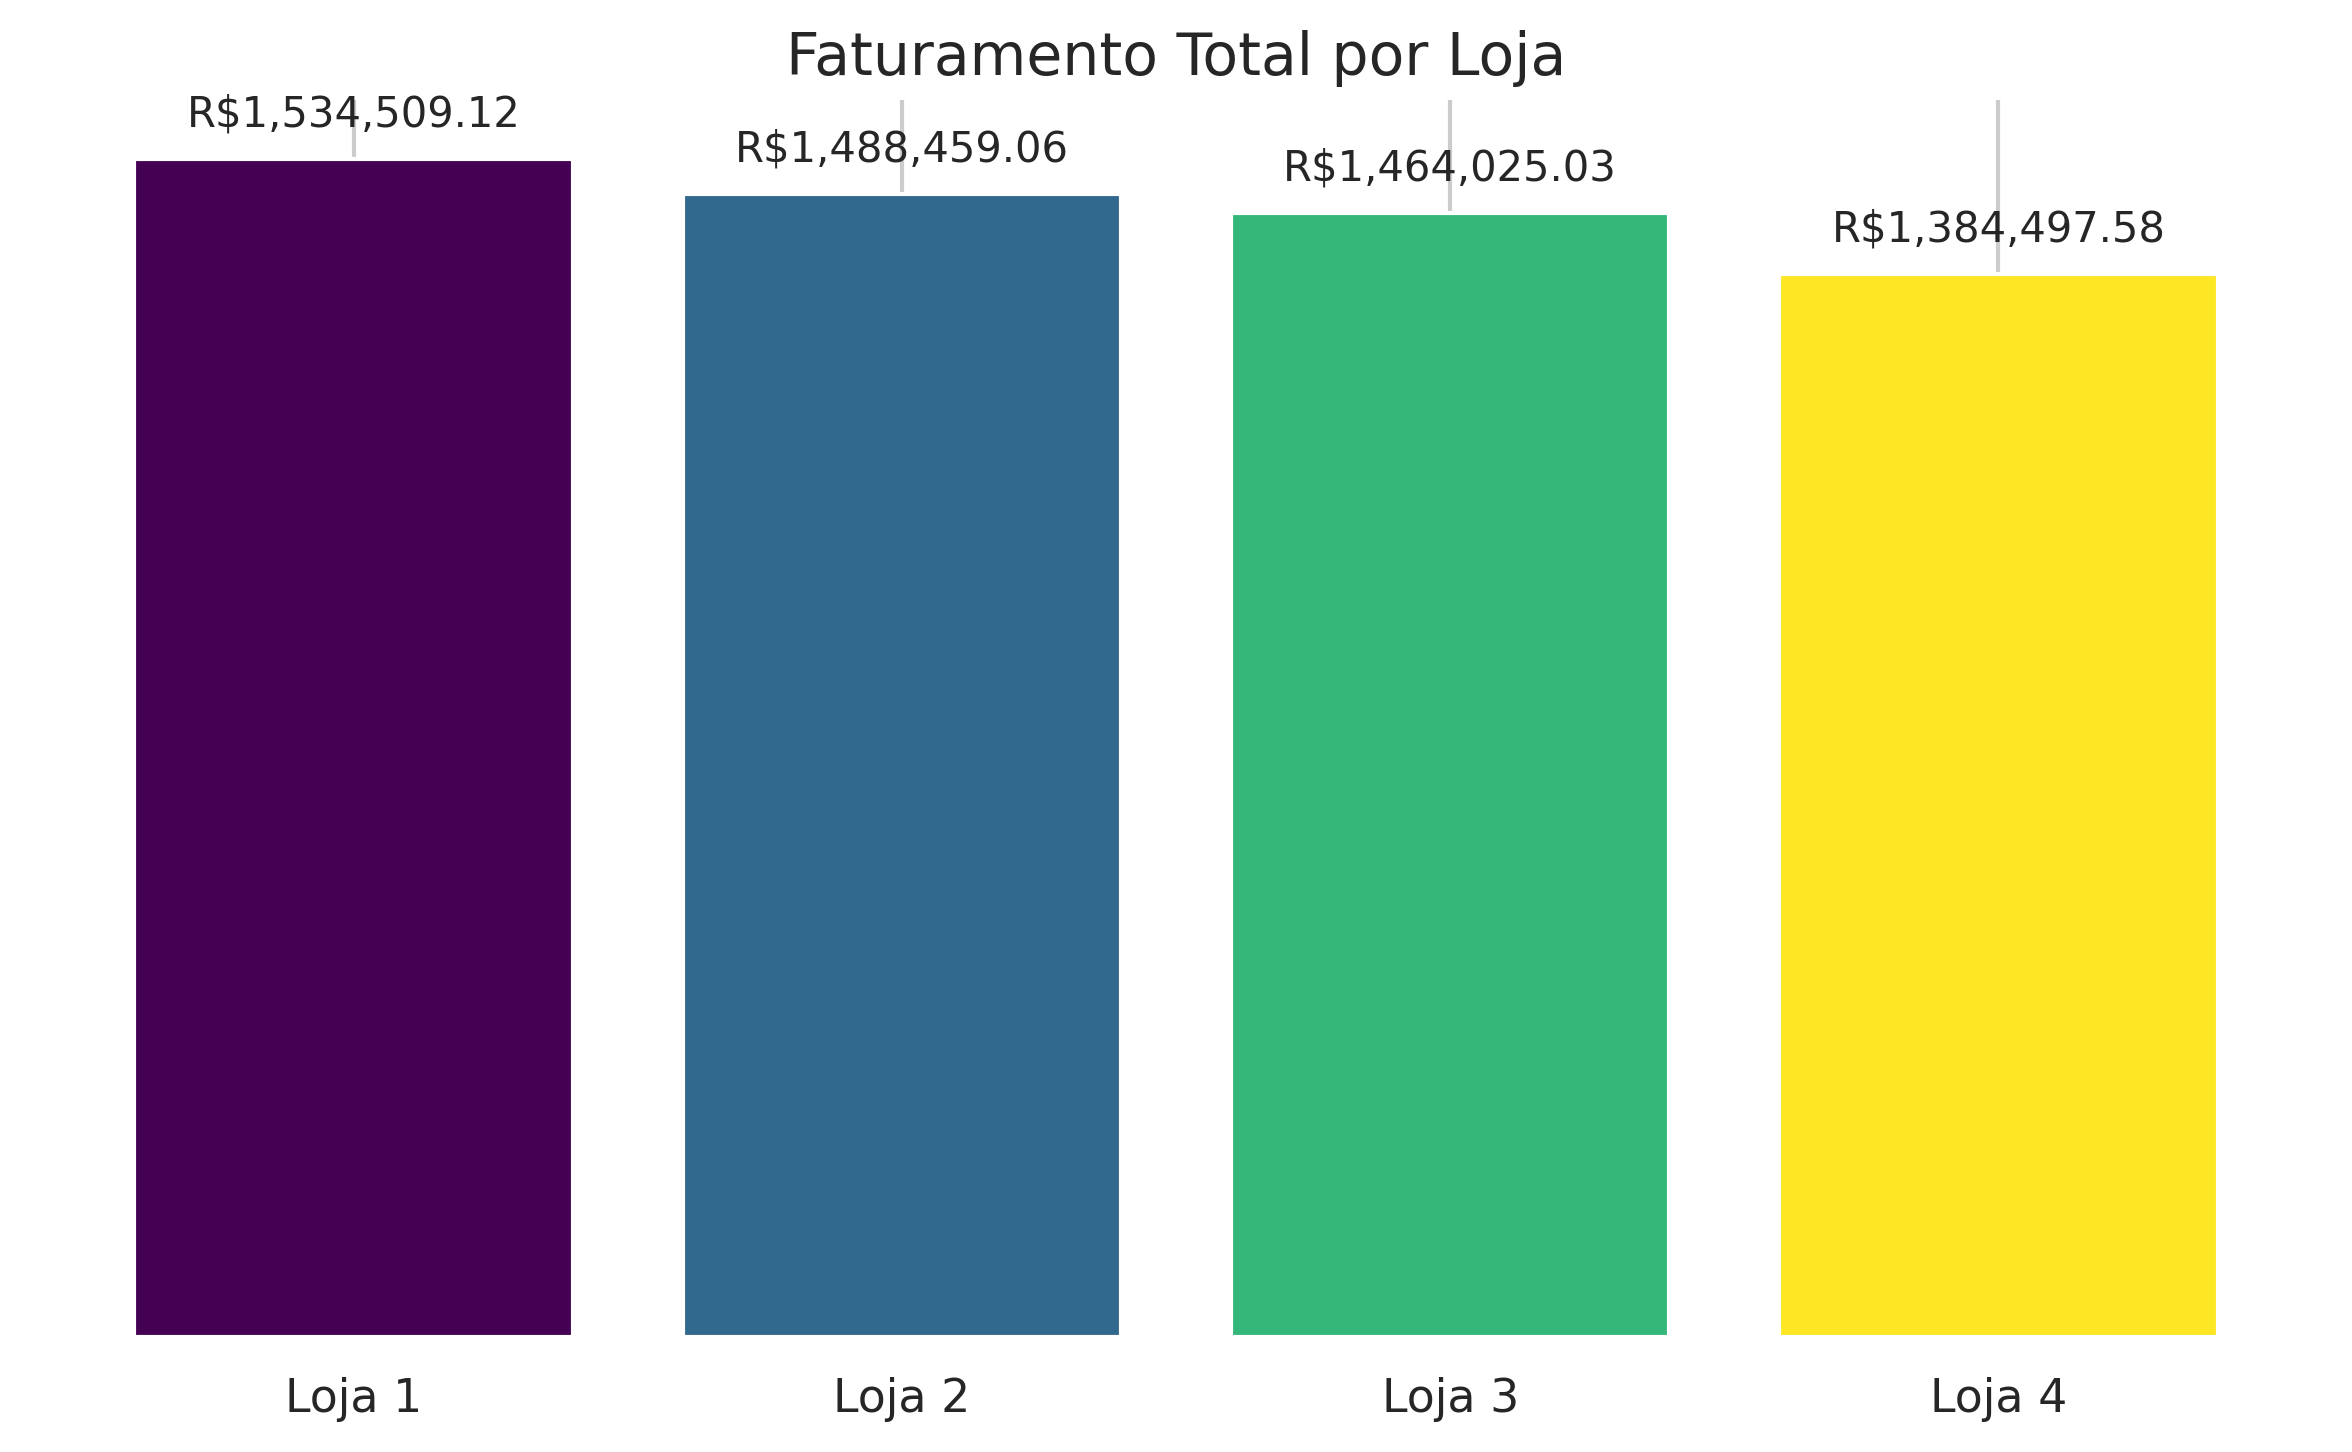

Podemos observar nesse gráfico que a **Loja 1** possui um maior faturamento, indicando um desempenho financeiro mais robusto. Enquanto que a **Loja 4** é a que possui o menor faturamento, o que pode indicar uma menor lucratividade.

### Vendas por Categoria

A distribuição de vendas por categoria em cada loja foi analisada:

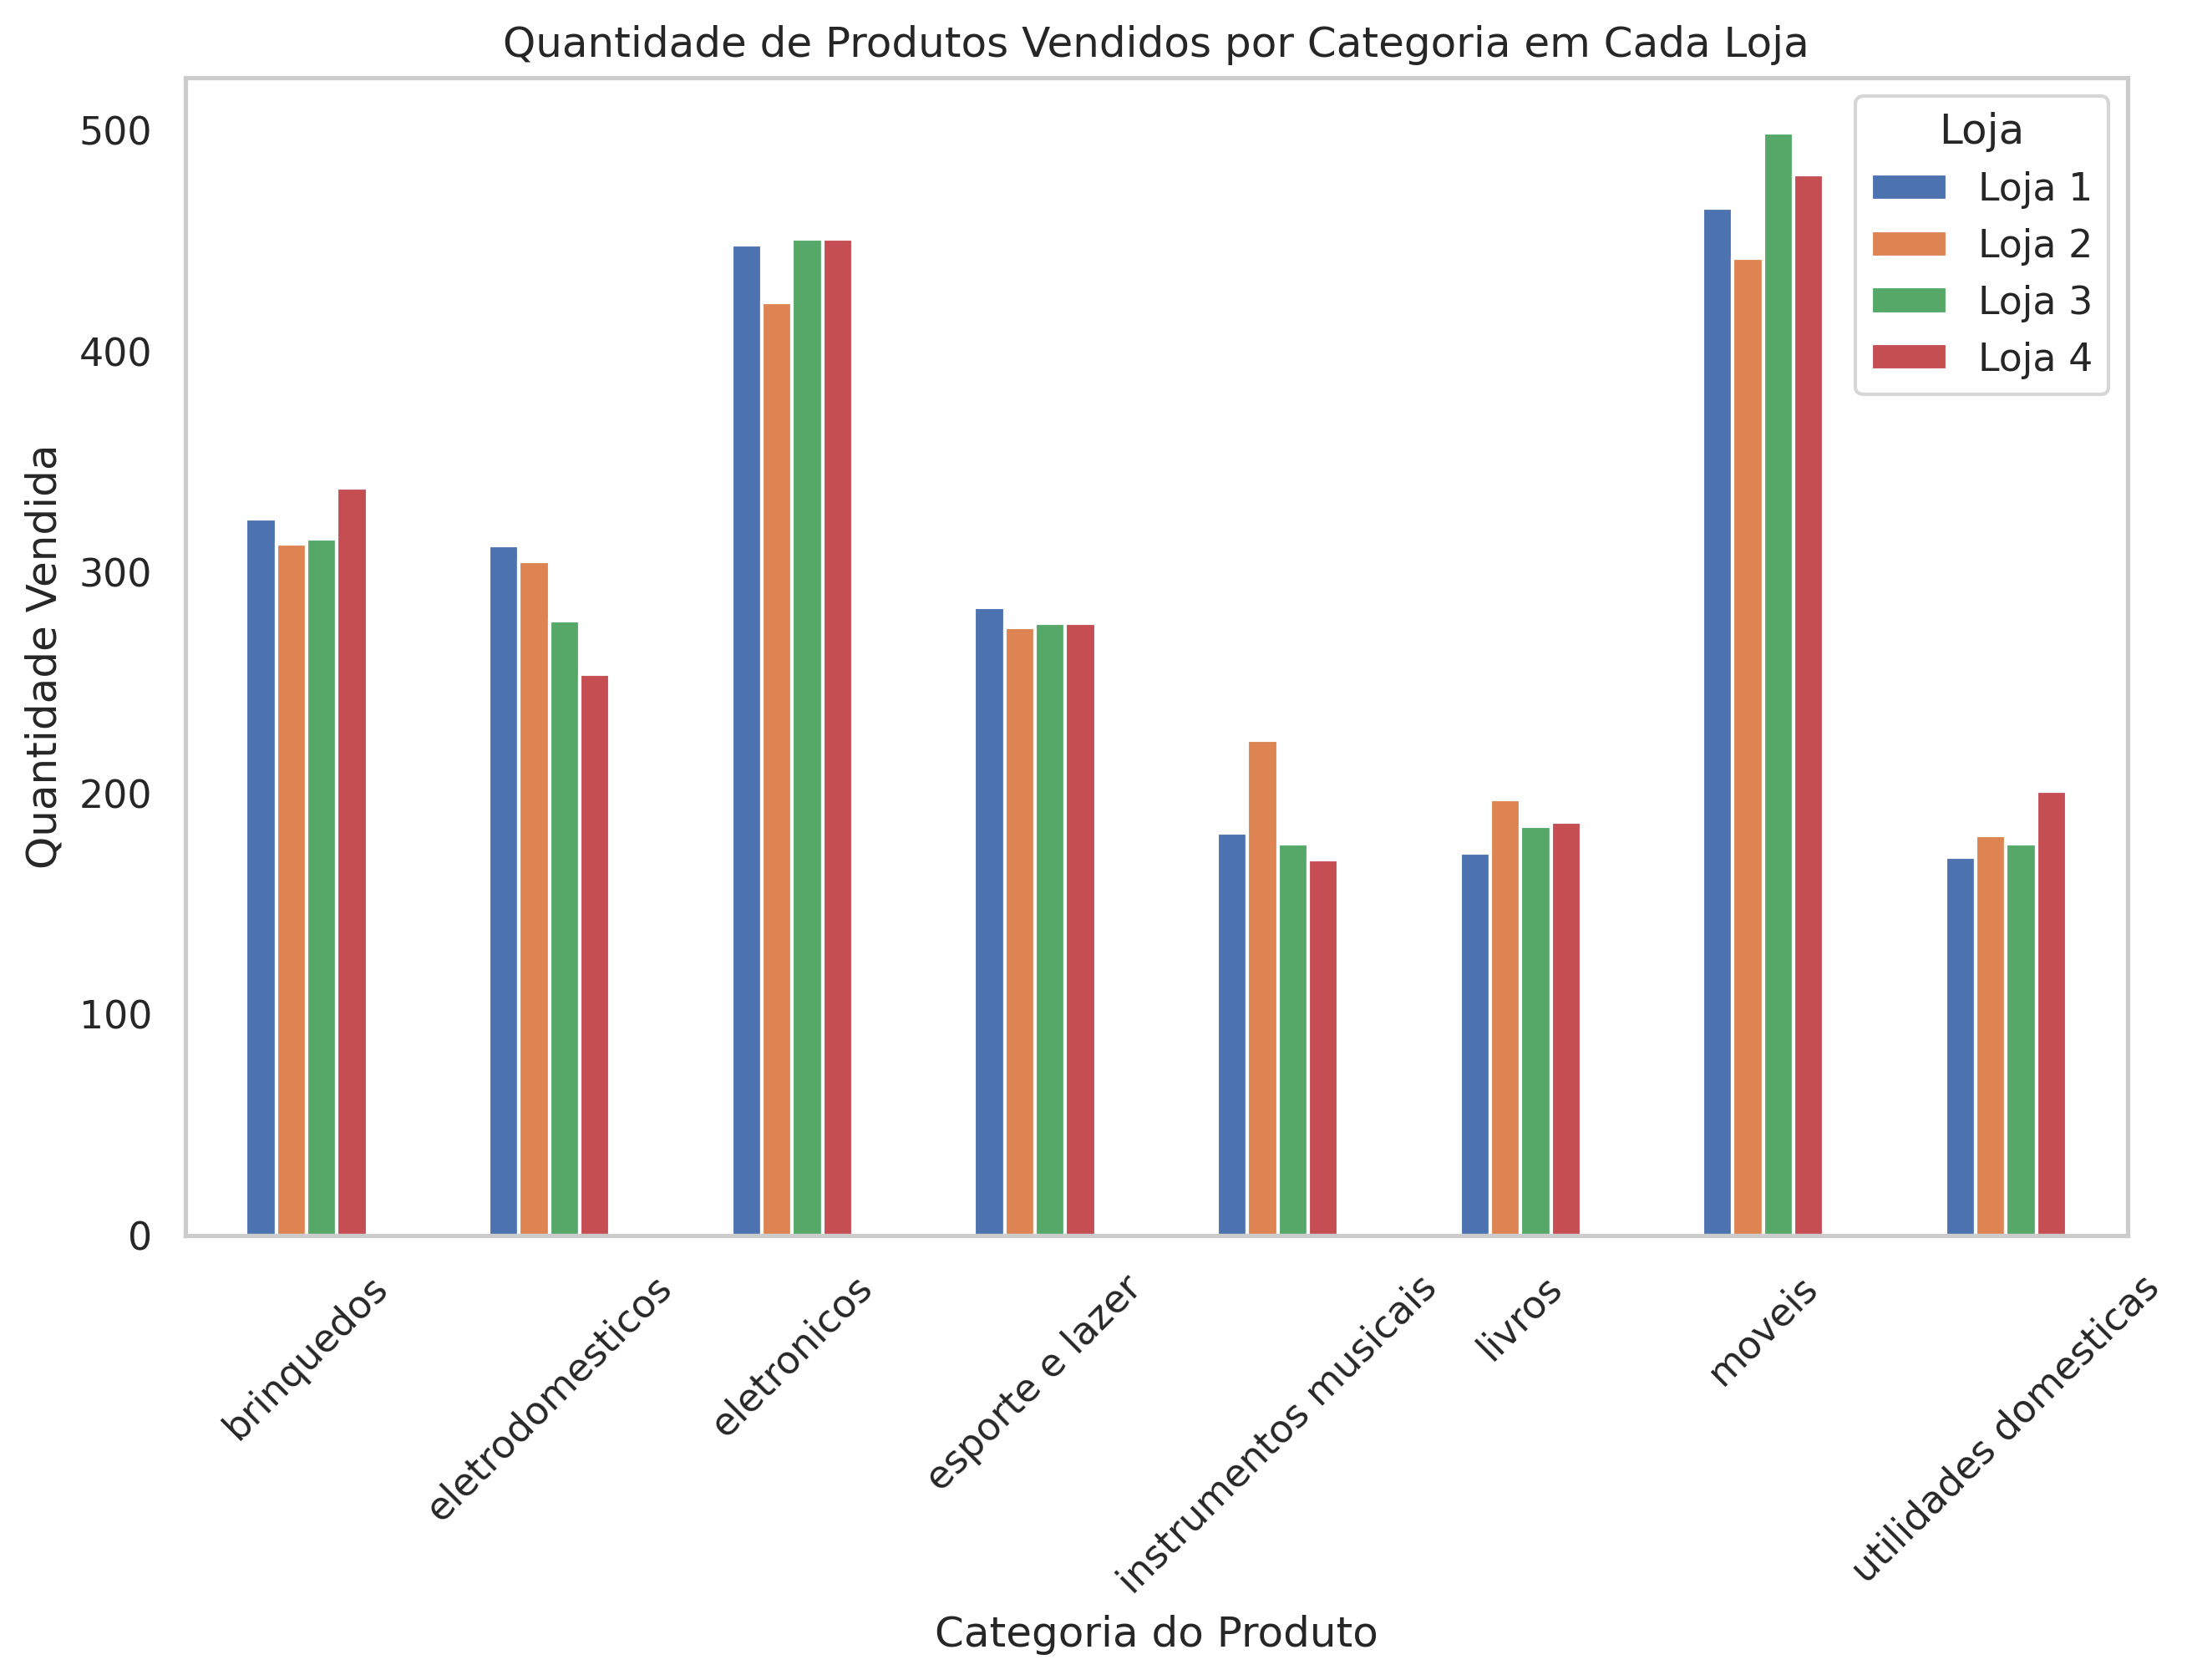

Por esse gráfico foi verificado que as categorias de eletronicos e moveis são as que mais venderam em todas as lojas, sendo que não houve muita discrepância de valores de vendas de uma loja para outra. Sendo que a loja 2 sendo a que menos vendeu. Em compensação ela foi a que mais vendeu em produtos como instrumentos musicais e livros, sendo essas as categorias que com menor quantidade de vendas.

### Produtos mais e menos vendidos.

Já na analise de produtos mais e menos vendido pode se notar que não ha uma grande discrepância de quantidade de venda de itens, nem por categoria e nem por loja.

In [102]:
produtos_mais_menos_vendidos(loja, 'Loja 1')
produtos_mais_menos_vendidos(loja2, 'Loja 2')
produtos_mais_menos_vendidos(loja3, 'Loja 3')
produtos_mais_menos_vendidos(loja4, 'Loja 4')

=== Loja 1 ===
Produtos mais vendidos:
                Produto  Quantidade_Vendida
47       TV Led UHD 4K                  60
37         Micro-ondas                  60
24       Guarda roupas                  60
43  Secadora de roupas                  58
3     Blocos de montar                  56 

Produtos menos vendidos:
                         Produto  Quantidade_Vendida
13  Ciência de dados com python                  39
40                     Pandeiro                  36
41            Panela de pressão                  35
11                 Celular ABXY                  33
26                      Headset                  33 

=== Loja 2 ===
Produtos mais vendidos:
                      Produto  Quantidade_Vendida
28  Iniciando em programação                  65
37               Micro-ondas                  62
1                    Bateria                  61
49                    Violão                  58
40                  Pandeiro                  58 

Produtos menos vendidos:

### Média das avaliações dos clientes x Custo médio de frete.

Nesses dois indicadores temos comportamentos diferentes como podemos ver no gráfico abaixo:
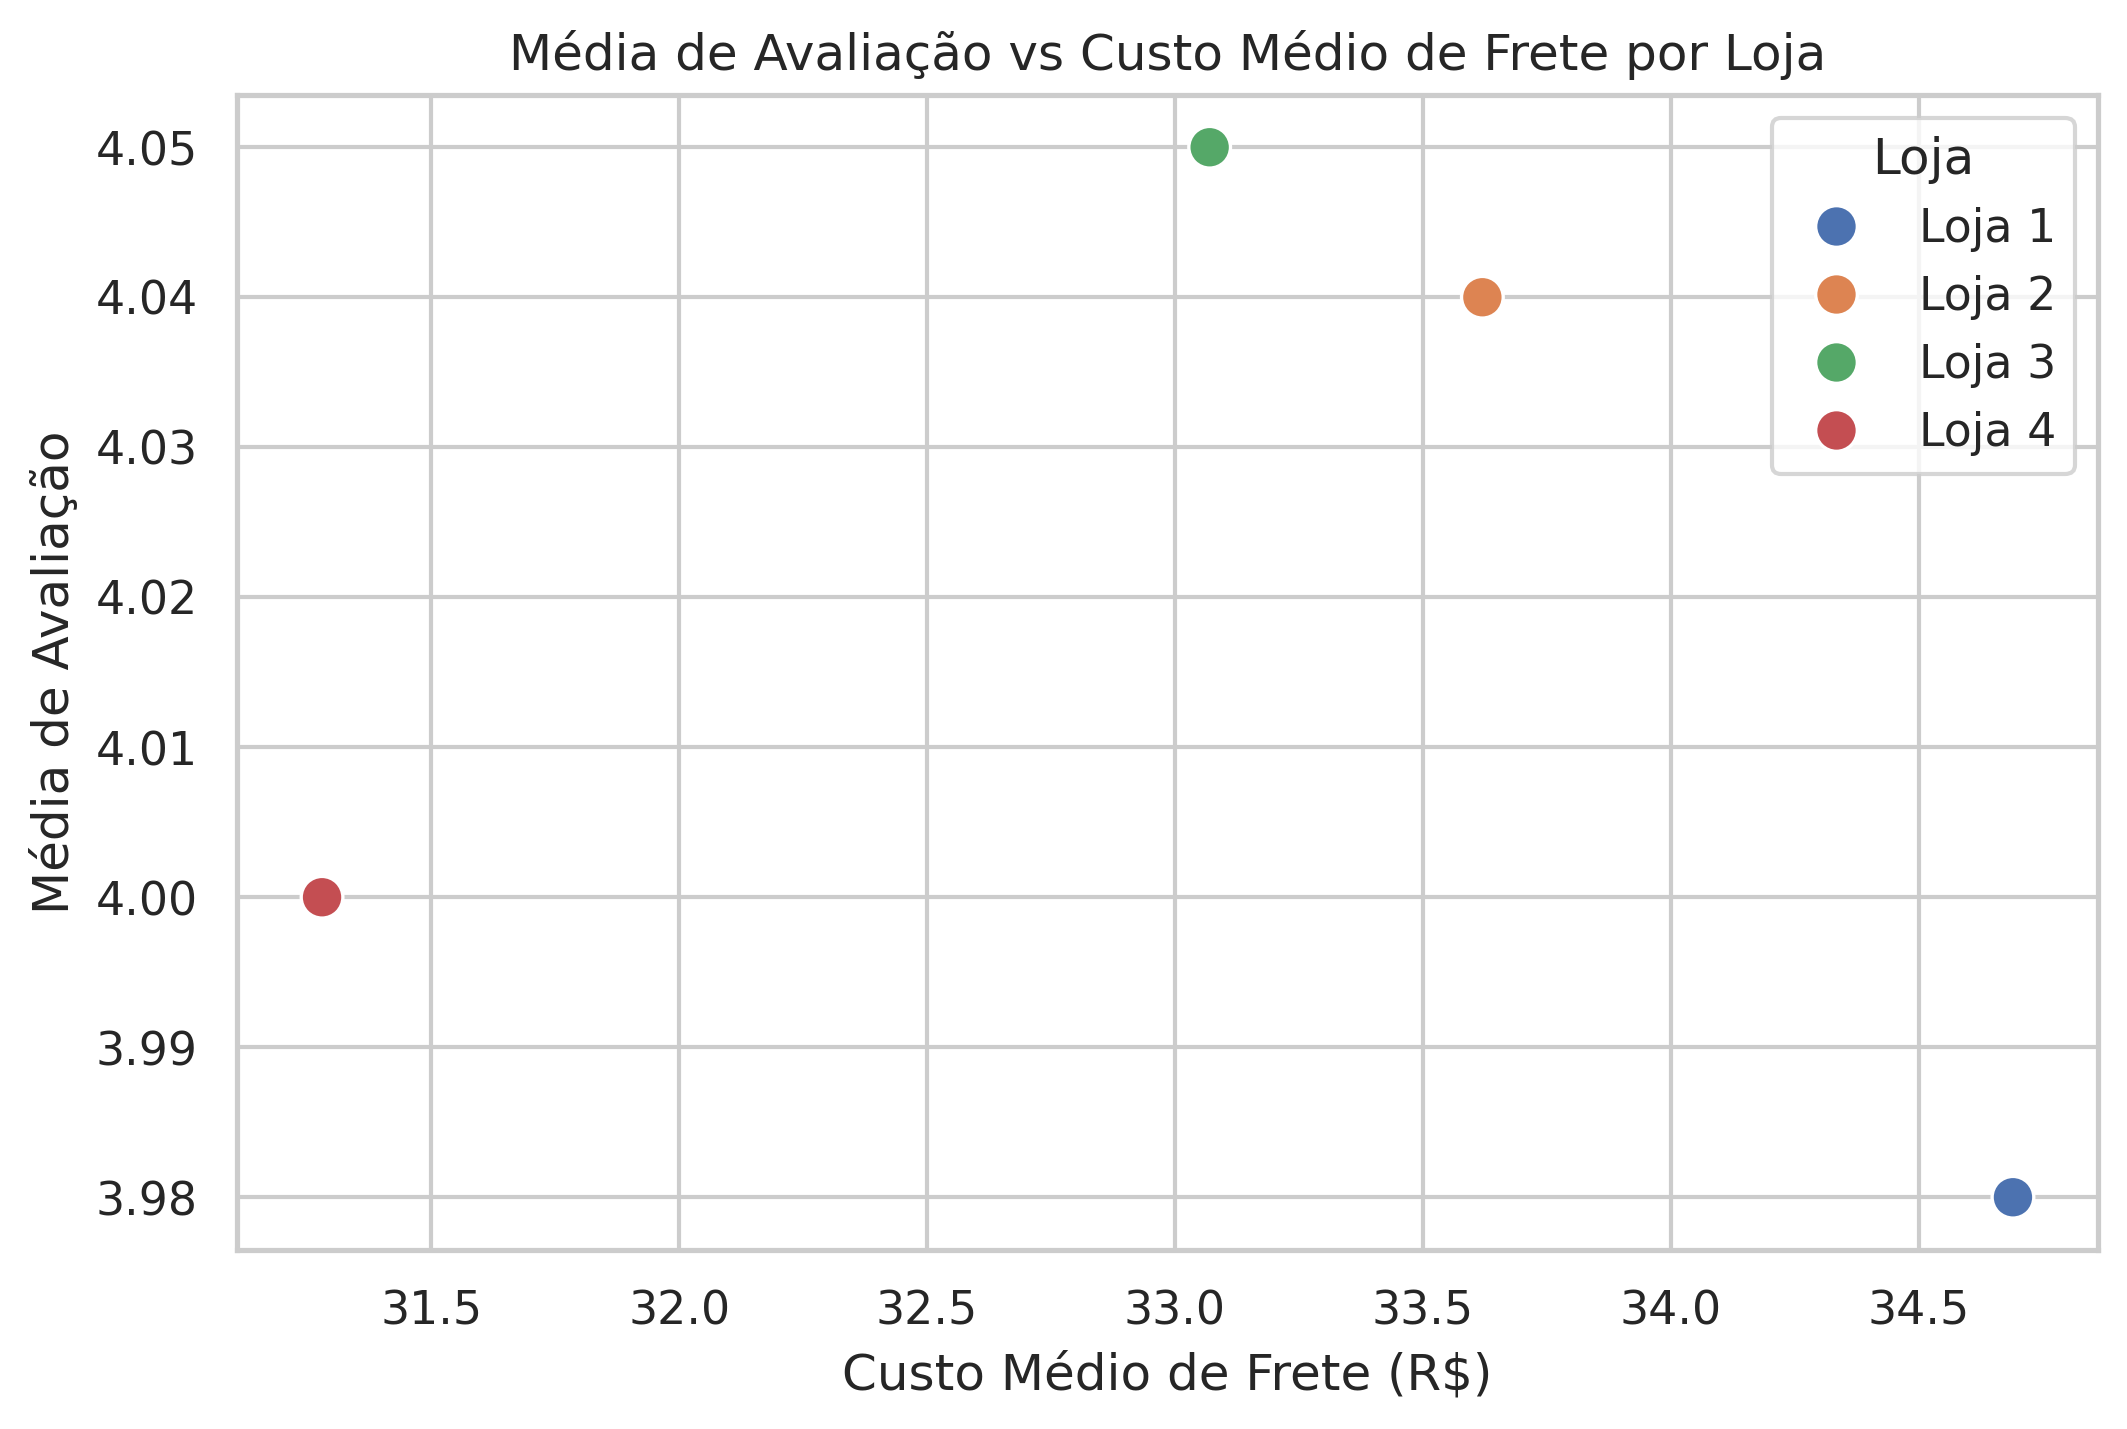

Aqui e mostrado que a **Loja 1** possui o maior valor de frete e a pior avaliação entre elas, já a **Loja 4** e a que possui o menor frete, enquanto a **Loja 3** é com a maior avaliação.

## Conclusão

Com base nos dados analisados acredito que a loja que possa ser vendida seja a **Loja 4** pois ela é a que tem o pior faturamento, chegando a ser somente aproximadamente 5% de diferença de faturamento da loja com o maior faturamento do seu João. Pois em questão de venda de produtos não se ha uma grande discrepância entre as lojas. E a avaliações dos cliente são muito proximas com um range de 3.98 a 4.05, sendo assim não foi levado em consderação para escolha da venda.